In [74]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold
from keras.optimizers import Adam, SGD
from keras import regularizers

from preprocess import normalize

window_size_ms = 200.
samples_per_window = 20

In [90]:
X = np.load("processed/combined_X.npy")
has_touch_y = np.load("processed/combined_has_touch_y.npy")
touch_loc_y = np.load("processed/combined_touch_loc_y.npy")
X = X.reshape((-1, 120))
X = X[has_touch_y == 1]
touch_loc_y = touch_loc_y[has_touch_y == 1]
touch_loc_y = (normalize(touch_loc_y) + 1)/2

Min:  [ 83.14286041 267.42855835]
Range:  [275.99999237 364.85714722]


In [91]:
print(X.shape)
print(touch_loc_y.shape)
print(np.ptp(X))
print(np.ptp(touch_loc_y))

(621, 120)
(621, 2)
1.9903527923202824
1.0


In [92]:
def build_model():
    model = Sequential()
    model.add(Dense(128, activation="relu", input_dim=(samples_per_window * 6)))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(64, activation="relu"))#, kernel_regularizer=regularizers.l2(0.003)))
    model.add(Dense(2, activation="linear", kernel_initializer="normal"))
    model.compile(loss="mean_squared_error", optimizer=SGD(lr=0.01, momentum=0.9), metrics = ["mse"])
    return model

In [93]:
model = build_model()
history = model.fit(np.random.rand(*X.shape), np.random.rand(*touch_loc_y.shape), epochs=100)

Epoch 1/100
621/621 [==============================] - 0s - loss: 0.1594 - mean_squared_error: 0.1594     
Epoch 2/100
621/621 [==============================] - 0s - loss: 0.0928 - mean_squared_error: 0.0928     
Epoch 3/100
621/621 [==============================] - 0s - loss: 0.0842 - mean_squared_error: 0.0842     
Epoch 4/100
621/621 [==============================] - 0s - loss: 0.0832 - mean_squared_error: 0.0832     
Epoch 5/100
621/621 [==============================] - 0s - loss: 0.0830 - mean_squared_error: 0.0830     
Epoch 6/100
621/621 [==============================] - 0s - loss: 0.0820 - mean_squared_error: 0.0820     
Epoch 7/100
621/621 [==============================] - 0s - loss: 0.0816 - mean_squared_error: 0.0816     
Epoch 8/100
621/621 [==============================] - 0s - loss: 0.0814 - mean_squared_error: 0.0814     
Epoch 9/100
621/621 [==============================] - 0s - loss: 0.0809 - mean_squared_error: 0.0809     
Epoch 10/100
621/621 [===============

621/621 [==============================] - 0s - loss: 0.0134 - mean_squared_error: 0.0134     
Epoch 77/100
621/621 [==============================] - 0s - loss: 0.0133 - mean_squared_error: 0.0133     
Epoch 78/100
621/621 [==============================] - 0s - loss: 0.0135 - mean_squared_error: 0.0135     
Epoch 79/100
621/621 [==============================] - 0s - loss: 0.0116 - mean_squared_error: 0.0116     
Epoch 80/100
621/621 [==============================] - 0s - loss: 0.0109 - mean_squared_error: 0.0109     
Epoch 81/100
621/621 [==============================] - 0s - loss: 0.0101 - mean_squared_error: 0.0101     
Epoch 82/100
621/621 [==============================] - 0s - loss: 0.0099 - mean_squared_error: 0.0099     
Epoch 83/100
621/621 [==============================] - 0s - loss: 0.0090 - mean_squared_error: 0.0090     
Epoch 84/100
621/621 [==============================] - 0s - loss: 0.0079 - mean_squared_error: 0.0079     
Epoch 85/100
621/621 [===================

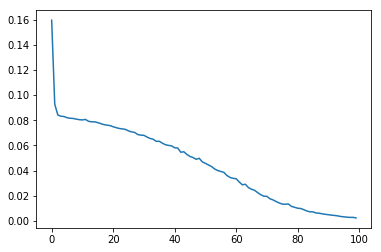

In [94]:
plt.plot(history.history["loss"])

In [95]:
kf = KFold(n_splits = 5, shuffle=True)
seed = 0

mses = []
histories = []

for train_idx, test_idx in kf.split(X, touch_loc_y):
    x_train, x_test = X[train_idx], X[test_idx]
    y_train, y_test = touch_loc_y[train_idx], touch_loc_y[test_idx]
    
    model = build_model()

    history = model.fit(x_train, y_train, epochs=200, batch_size=20, validation_data=(x_test, y_test))
    _, mse = model.evaluate(x_test, y_test)
    print("MSE: ", mse)
    mses.append(mse)
    histories.append(history)

Train on 496 samples, validate on 125 samples
Epoch 1/200
496/496 [==============================] - 0s - loss: 0.0826 - mean_squared_error: 0.0826 - val_loss: 0.0347 - val_mean_squared_error: 0.0347
Epoch 2/200
496/496 [==============================] - 0s - loss: 0.0378 - mean_squared_error: 0.0378 - val_loss: 0.0338 - val_mean_squared_error: 0.0338
Epoch 3/200
496/496 [==============================] - 0s - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.0323 - val_mean_squared_error: 0.0323
Epoch 4/200
496/496 [==============================] - 0s - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
Epoch 5/200
496/496 [==============================] - 0s - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.0308 - val_mean_squared_error: 0.0308
Epoch 6/200
496/496 [==============================] - 0s - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.0307 - val_mean_squared_error: 0.0307
Epoch 7/200
496/496 [=========

496/496 [==============================] - 0s - loss: 0.0187 - mean_squared_error: 0.0187 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 54/200
496/496 [==============================] - 0s - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 55/200
496/496 [==============================] - 0s - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 56/200
496/496 [==============================] - 0s - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 57/200
496/496 [==============================] - 0s - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 58/200
496/496 [==============================] - 0s - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 59/200
496/496 [==============================] - 0s - loss: 0.0177 - mean_sq

496/496 [==============================] - 0s - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 106/200
496/496 [==============================] - 0s - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 107/200
496/496 [==============================] - 0s - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 108/200
496/496 [==============================] - 0s - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 109/200
496/496 [==============================] - 0s - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0273 - val_mean_squared_error: 0.0273
Epoch 110/200
496/496 [==============================] - 0s - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 111/200
496/496 [==============================] - 0s - loss: 0.0109 - m

496/496 [==============================] - 0s - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 158/200
496/496 [==============================] - 0s - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 159/200
496/496 [==============================] - 0s - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 160/200
496/496 [==============================] - 0s - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 161/200
496/496 [==============================] - 0s - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0325 - val_mean_squared_error: 0.0325
Epoch 162/200
496/496 [==============================] - 0s - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 163/200
496/496 [==============================] - 0s - loss: 0.0069 - m

497/497 [==============================] - 0s - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.0306 - val_mean_squared_error: 0.0306
Epoch 9/200
497/497 [==============================] - 0s - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 10/200
497/497 [==============================] - 0s - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 11/200
497/497 [==============================] - 0s - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.0288 - val_mean_squared_error: 0.0288
Epoch 12/200
497/497 [==============================] - 0s - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 13/200
497/497 [==============================] - 0s - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 14/200
497/497 [==============================] - 0s - loss: 0.0315 - mean_squ

497/497 [==============================] - 0s - loss: 0.0185 - mean_squared_error: 0.0185 - val_loss: 0.0201 - val_mean_squared_error: 0.0201
Epoch 61/200
497/497 [==============================] - 0s - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0210 - val_mean_squared_error: 0.0210
Epoch 62/200
497/497 [==============================] - 0s - loss: 0.0178 - mean_squared_error: 0.0178 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch 63/200
497/497 [==============================] - 0s - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0201 - val_mean_squared_error: 0.0201
Epoch 64/200
497/497 [==============================] - 0s - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch 65/200
497/497 [==============================] - 0s - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0211 - val_mean_squared_error: 0.0211
Epoch 66/200
497/497 [==============================] - 0s - loss: 0.0167 - mean_sq

497/497 [==============================] - 0s - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0213 - val_mean_squared_error: 0.0213
Epoch 113/200
497/497 [==============================] - 0s - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0215 - val_mean_squared_error: 0.0215
Epoch 114/200
497/497 [==============================] - 0s - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0201 - val_mean_squared_error: 0.0201
Epoch 115/200
497/497 [==============================] - 0s - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0213 - val_mean_squared_error: 0.0213
Epoch 116/200
497/497 [==============================] - 0s - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 117/200
497/497 [==============================] - 0s - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0215 - val_mean_squared_error: 0.0215
Epoch 118/200
497/497 [==============================] - 0s - loss: 0.0112 - m

497/497 [==============================] - 0s - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0224 - val_mean_squared_error: 0.0224
Epoch 165/200
497/497 [==============================] - 0s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0213 - val_mean_squared_error: 0.0213
Epoch 166/200
497/497 [==============================] - 0s - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0209 - val_mean_squared_error: 0.0209
Epoch 167/200
497/497 [==============================] - 0s - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch 168/200
497/497 [==============================] - 0s - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0212 - val_mean_squared_error: 0.0212
Epoch 169/200
497/497 [==============================] - 0s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 170/200
497/497 [==============================] - 0s - loss: 0.0068 - m

497/497 [==============================] - 0s - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0303 - val_mean_squared_error: 0.0303
Epoch 16/200
497/497 [==============================] - 0s - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 0.0308 - val_mean_squared_error: 0.0308
Epoch 17/200
497/497 [==============================] - 0s - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 18/200
497/497 [==============================] - 0s - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 19/200
497/497 [==============================] - 0s - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 20/200
497/497 [==============================] - 0s - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 21/200
497/497 [==============================] - 0s - loss: 0.0239 - mean_sq

497/497 [==============================] - 0s - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 68/200
497/497 [==============================] - 0s - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 69/200
497/497 [==============================] - 0s - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 70/200
497/497 [==============================] - 0s - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 71/200
497/497 [==============================] - 0s - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 72/200
497/497 [==============================] - 0s - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 73/200
497/497 [==============================] - 0s - loss: 0.0147 - mean_sq

497/497 [==============================] - 0s - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 120/200
497/497 [==============================] - 0s - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0273 - val_mean_squared_error: 0.0273
Epoch 121/200
497/497 [==============================] - 0s - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 122/200
497/497 [==============================] - 0s - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 123/200
497/497 [==============================] - 0s - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 124/200
497/497 [==============================] - 0s - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 125/200
497/497 [==============================] - 0s - loss: 0.0085 - m

497/497 [==============================] - 0s - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 172/200
497/497 [==============================] - 0s - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 173/200
497/497 [==============================] - 0s - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 174/200
497/497 [==============================] - 0s - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 175/200
497/497 [==============================] - 0s - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 176/200
497/497 [==============================] - 0s - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 177/200
497/497 [==============================] - 0s - loss: 0.0050 - m

497/497 [==============================] - 0s - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 24/200
497/497 [==============================] - 0s - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 25/200
497/497 [==============================] - 0s - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 26/200
497/497 [==============================] - 0s - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0320 - val_mean_squared_error: 0.0320
Epoch 27/200
497/497 [==============================] - 0s - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0301 - val_mean_squared_error: 0.0301
Epoch 28/200
497/497 [==============================] - 0s - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 29/200
497/497 [==============================] - 0s - loss: 0.0215 - mean_sq

497/497 [==============================] - 0s - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 76/200
497/497 [==============================] - 0s - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 77/200
497/497 [==============================] - 0s - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 78/200
497/497 [==============================] - 0s - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 79/200
497/497 [==============================] - 0s - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch 80/200
497/497 [==============================] - 0s - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch 81/200
497/497 [==============================] - 0s - loss: 0.0139 - mean_sq

497/497 [==============================] - 0s - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 128/200
497/497 [==============================] - 0s - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 129/200
497/497 [==============================] - 0s - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 130/200
497/497 [==============================] - 0s - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 131/200
497/497 [==============================] - 0s - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 132/200
497/497 [==============================] - 0s - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 133/200
497/497 [==============================] - 0s - loss: 0.0085 - m

497/497 [==============================] - 0s - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 180/200
497/497 [==============================] - 0s - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0294 - val_mean_squared_error: 0.0294
Epoch 181/200
497/497 [==============================] - 0s - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 182/200
497/497 [==============================] - 0s - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 183/200
497/497 [==============================] - 0s - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0320 - val_mean_squared_error: 0.0320
Epoch 184/200
497/497 [==============================] - 0s - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 185/200
497/497 [==============================] - 0s - loss: 0.0054 - m

497/497 [==============================] - 0s - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 32/200
497/497 [==============================] - 0s - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 33/200
497/497 [==============================] - 0s - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 34/200
497/497 [==============================] - 0s - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 35/200
497/497 [==============================] - 0s - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 36/200
497/497 [==============================] - 0s - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 37/200
497/497 [==============================] - 0s - loss: 0.0209 - mean_sq

497/497 [==============================] - 0s - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 84/200
497/497 [==============================] - 0s - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 85/200
497/497 [==============================] - 0s - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 86/200
497/497 [==============================] - 0s - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 87/200
497/497 [==============================] - 0s - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0308 - val_mean_squared_error: 0.0308
Epoch 88/200
497/497 [==============================] - 0s - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 89/200
497/497 [==============================] - 0s - loss: 0.0120 - mean_sq

497/497 [==============================] - 0s - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 136/200
497/497 [==============================] - 0s - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 137/200
497/497 [==============================] - 0s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 138/200
497/497 [==============================] - 0s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0228 - val_mean_squared_error: 0.0228
Epoch 139/200
497/497 [==============================] - 0s - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 140/200
497/497 [==============================] - 0s - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 141/200
497/497 [==============================] - 0s - loss: 0.0080 - m

497/497 [==============================] - 0s - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 188/200
497/497 [==============================] - 0s - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 189/200
497/497 [==============================] - 0s - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0232 - val_mean_squared_error: 0.0232
Epoch 190/200
497/497 [==============================] - 0s - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 191/200
497/497 [==============================] - 0s - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 192/200
497/497 [==============================] - 0s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 193/200
497/497 [==============================] - 0s - loss: 0.0045 - m

In [96]:
print(mses)
print(np.mean(mses))

[0.030479383528232575, 0.02256986649046021, 0.030027632691687154, 0.030152277540295355, 0.02300554267581432]
0.027246940585297925


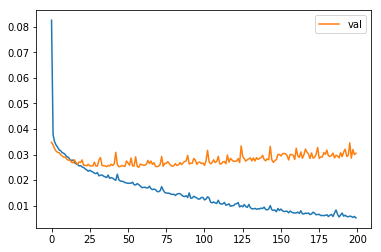

In [97]:
plt.plot(histories[0].history["loss"])
plt.plot(histories[0].history["val_loss"], label="val")
plt.legend()

/Users/jessy/.virtualenvs/cocosci/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


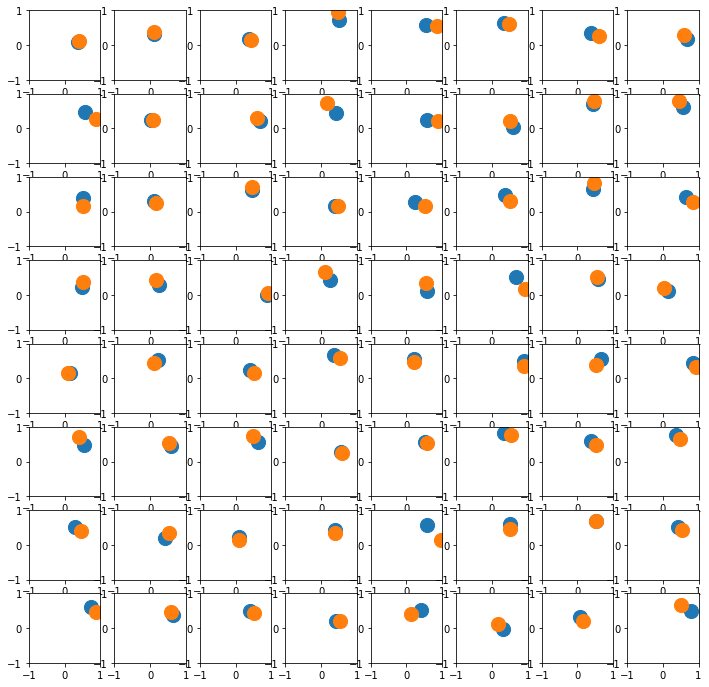

In [100]:
nrows = 8
ncols = 8

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 12))
axes = axes.reshape(-1)

for i in range(nrows * ncols):
    axes[i].scatter(*model.predict(x_test)[i], s=200)
    axes[i].scatter(*y_test[i], s=200)
    
    axes[i].set_xlim(-1, 1)
    axes[i].set_ylim(-1, 1)

fig.show()

In [72]:
np.min(y_test)

0.019577205367274808

In [73]:
np.max(y_test)

1.0